# Escuela Politéncnica Nacioanl
## [Tarea 09] Ejercicios Unidad 04-A-B | Eliminación gaussiana vs Gauss-Jordan
## Métodos Numéricos
## Jhonn Alexander Saeteros Laime

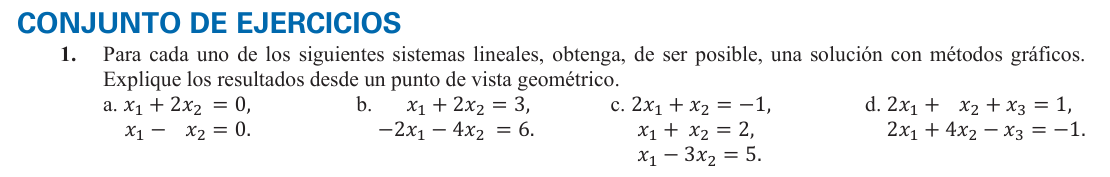

In [98]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from sympy import symbols, solve

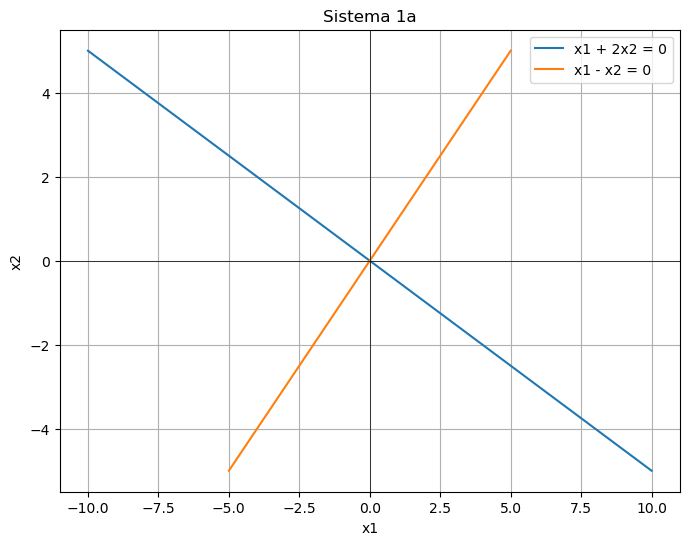

Solución exacta: x1 = 0.0, x2 = -0.0


In [99]:
# Sistema: 
# x1 + 2x2 = 0
# x1 - x2 = 0

x2 = np.linspace(-5, 5, 100)
x1_1 = -2*x2
x1_2 = x2

plt.figure(figsize=(8, 6))
plt.plot(x1_1, x2, label='x1 + 2x2 = 0')
plt.plot(x1_2, x2, label='x1 - x2 = 0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Sistema 1a')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

# Solución exacta
A = np.array([[1, 2], [1, -1]])
b = np.array([0, 0])
sol = linalg.solve(A, b)
print(f"Solución exacta: x1 = {sol[0]}, x2 = {sol[1]}")

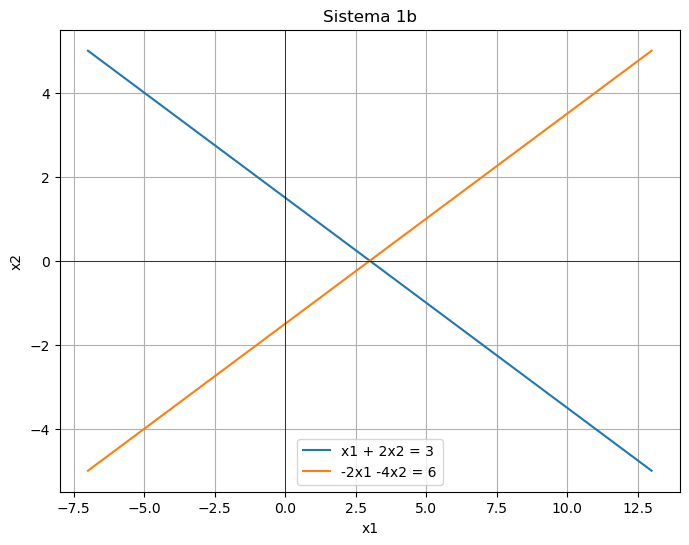

El sistema no tiene solución única (las rectas son paralelas coincidentes o paralelas distintas)


In [100]:
# Sistema:
# x1 + 2x2 = 3
# -2x1 -4x2 = 6

x2 = np.linspace(-5, 5, 100)
x1_1 = 3 - 2*x2
x1_2 = (-6 -4*x2)/-2

plt.figure(figsize=(8, 6))
plt.plot(x1_1, x2, label='x1 + 2x2 = 3')
plt.plot(x1_2, x2, label='-2x1 -4x2 = 6')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Sistema 1b')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

# Verificación de solución
A = np.array([[1, 2], [-2, -4]])
b = np.array([3, 6])
try:
    sol = linalg.solve(A, b)
except np.linalg.LinAlgError:
    print("El sistema no tiene solución única (las rectas son paralelas coincidentes o paralelas distintas)")

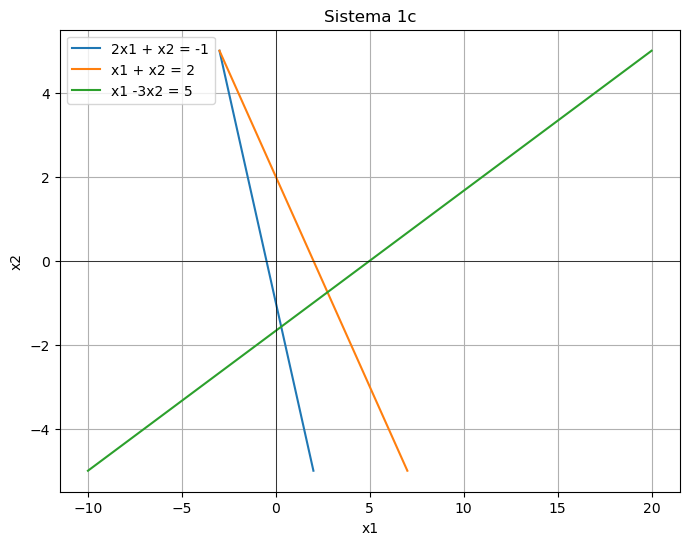

Solución primeras dos ecuaciones: x1 = -3.0, x2 = 5.0
Verificación tercera ecuación: -3.0 - 3*5.0 = -18.0 (debería ser 5)


In [101]:
# Sistema:
# 2x1 + x2 = -1
# x1 + x2 = 2
# x1 -3x2 = 5

x2 = np.linspace(-5, 5, 100)
x1_1 = (-1 - x2)/2
x1_2 = 2 - x2
x1_3 = 5 + 3*x2

plt.figure(figsize=(8, 6))
plt.plot(x1_1, x2, label='2x1 + x2 = -1')
plt.plot(x1_2, x2, label='x1 + x2 = 2')
plt.plot(x1_3, x2, label='x1 -3x2 = 5')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Sistema 1c')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

# Solución de las primeras dos ecuaciones
A = np.array([[2, 1], [1, 1]])
b = np.array([-1, 2])
sol = linalg.solve(A, b)
print(f"Solución primeras dos ecuaciones: x1 = {sol[0]}, x2 = {sol[1]}")
print(f"Verificación tercera ecuación: {sol[0]} - 3*{sol[1]} = {sol[0]-3*sol[1]} (debería ser 5)")

In [102]:
# Sistema:
# 2x1 + x2 + x3 = 1
# 2x1 + 4x2 - x3 = -1

# No podemos graficar fácilmente en 3D, pero podemos resolver paramétricamente
A = np.array([[2, 1, 1], [2, 4, -1]])
b = np.array([1, -1])

# Reducción por eliminación gaussiana
Ab = np.column_stack((A, b))
print("Matriz aumentada:\n", Ab)

# Restamos la primera fila de la segunda
Ab[1] = Ab[1] - Ab[0]
print("\nDespués de eliminación:\n", Ab)

# Solución paramétrica
x3 = symbols('x3')
x2 = (-2 - (-2)*x3)/3
x1 = (1 - x2 - x3)/2
print(f"Solución paramétrica: x1 = {x1}, x2 = {x2}, x3 = libre")

Matriz aumentada:
 [[ 2  1  1  1]
 [ 2  4 -1 -1]]

Después de eliminación:
 [[ 2  1  1  1]
 [ 0  3 -2 -2]]
Solución paramétrica: x1 = 5/6 - 5*x3/6, x2 = 2*x3/3 - 2/3, x3 = libre


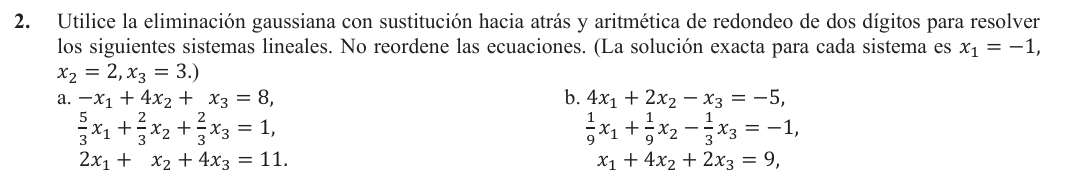

In [103]:
def gauss_elimination_2digit(A, b):
    n = len(b)
    Ab = np.column_stack((A, b)).astype(float)
    
    for k in range(n-1):
        for i in range(k+1, n):
            factor = round(Ab[i,k] / Ab[k,k], 2)
            for j in range(k, n+1):
                Ab[i,j] = round(Ab[i,j] - round(factor * Ab[k,j], 2), 2)
    
    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        sum_ax = 0
        for j in range(i+1, n):
            sum_ax = round(sum_ax + round(Ab[i,j] * x[j], 2), 2)
        x[i] = round((Ab[i,n] - sum_ax) / Ab[i,i], 2)
    
    return x

# Sistema a
A = np.array([
    [-1, 4, 1],
    [5/3, 2/3, 2/3],
    [2, 1, 4]
])
b = np.array([8, 1, 11])

sol = gauss_elimination_2digit(A, b)
print(f"Solución con redondeo a 2 dígitos: {sol}")
print(f"Solución exacta debería ser: [-1, 2, 3]")

Solución con redondeo a 2 dígitos: [-0.99  1.    3.01]
Solución exacta debería ser: [-1, 2, 3]


In [104]:
# Sistema b
A = np.array([
    [4, 2, -1],
    [1/9, 1/9, -1/3],
    [1, 4, 2]
])
b = np.array([-5, -1, 9])

sol = gauss_elimination_2digit(A, b)
print(f"Solución con redondeo a 2 dígitos: {sol}")
print(f"Solución exacta debería ser: [-1, 2, 3]")

Solución con redondeo a 2 dígitos: [-1.  1.  3.]
Solución exacta debería ser: [-1, 2, 3]


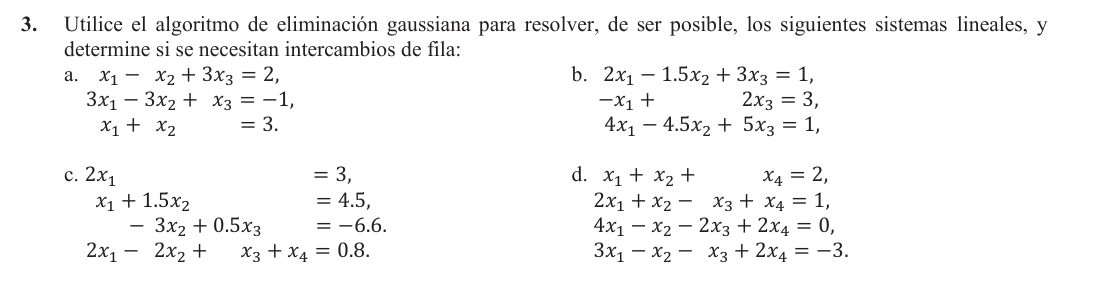

In [105]:
def gauss_elimination_pivoting(A, b):
    n = len(b)
    Ab = np.column_stack((A, b)).astype(float)
    
    for k in range(n-1):
        # Pivoteo parcial
        max_row = np.argmax(np.abs(Ab[k:, k])) + k
        Ab[[k, max_row]] = Ab[[max_row, k]]
        
        for i in range(k+1, n):
            factor = Ab[i,k] / Ab[k,k]
            for j in range(k, n+1):
                Ab[i,j] -= factor * Ab[k,j]
    
    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (Ab[i,n] - np.dot(Ab[i,i+1:n], x[i+1:n])) / Ab[i,i]
    
    return x

# Sistema a
A = np.array([
    [1, -1, 3],
    [3, -3, 1],
    [1, 1, 0]
])
b = np.array([2, -1, 3])

sol = gauss_elimination_pivoting(A, b)
print(f"Solución con pivoteo: {sol}")

Solución con pivoteo: [1.1875 1.8125 0.875 ]


In [106]:
def gauss_elimination_pivoting(A, b):
    n = len(b)
    Ab = np.column_stack((A, b)).astype(float)
    
    for k in range(n-1):
        # Pivoteo parcial
        max_row = np.argmax(np.abs(Ab[k:, k])) + k
        Ab[[k, max_row]] = Ab[[max_row, k]]
        
        for i in range(k+1, n):
            factor = Ab[i,k] / Ab[k,k]
            for j in range(k, n+1):
                Ab[i,j] -= factor * Ab[k,j]
    
    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (Ab[i,n] - np.dot(Ab[i,i+1:n], x[i+1:n])) / Ab[i,i]
    
    return x

# Sistema a
A = np.array([
    [2, -1.5, 3],
    [-1, 0, 2],
    [4, -4.5, 5]
])
b = np.array([1, 3, 1])

sol = gauss_elimination_pivoting(A, b)
print(f"Solución con pivoteo: {sol}")

Solución con pivoteo: [-1. -0.  1.]


In [107]:
# Sistema c (4x4)
A = np.array([
    [2, 0, 0, 0],
    [1, 1.5, 0, 0],
    [0, -3, 0.5, 0],
    [2, -2, 1, 1]
])
b = np.array([3, 4.5, -6.6, 0.8])

sol = gauss_elimination_pivoting(A, b)
print(f"Solución con pivoteo: {sol}")

Solución con pivoteo: [ 1.5  2.  -1.2  3. ]


In [108]:
def gauss_elimination_pivoting(A, b):
    n = len(b)
    Ab = np.column_stack((A, b)).astype(float)
    
    for k in range(n-1):
        # Pivoteo parcial
        max_row = np.argmax(np.abs(Ab[k:, k])) + k
        Ab[[k, max_row]] = Ab[[max_row, k]]
        
        for i in range(k+1, n):
            factor = Ab[i,k] / Ab[k,k]
            for j in range(k, n+1):
                Ab[i,j] -= factor * Ab[k,j]
    
    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (Ab[i,n] - np.dot(Ab[i,i+1:n], x[i+1:n])) / Ab[i,i]
    
    return x

# Sistema a
A = np.array([
    [1, 1, 0, 1],
    [2, 1, -1, 1],
    [4, -1, -2, 2],
    [3, -1, -1, 2]
])
b = np.array([2, 1, 0, -3])

sol = gauss_elimination_pivoting(A, b)
print(f"Solución con pivoteo: {sol}")

Solución con pivoteo: [ nan  nan  inf -inf]


C:\Users\Jhonn22\AppData\Local\Temp\ipykernel_20196\2074908862.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  x[i] = (Ab[i,n] - np.dot(Ab[i,i+1:n], x[i+1:n])) / Ab[i,i]
